In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path='/content/drive/MyDrive/Advertising_Sales.csv'
df=pd.read_csv(file_path)
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

**Handling Null Values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# No null values found

**Handling Duplicates**

In [6]:
df.duplicated().sum()

0

In [7]:
# No duplicated value found

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True) # dropping Unnamed: 0

In [9]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# **EDA**

In [10]:
corr=df.corr()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

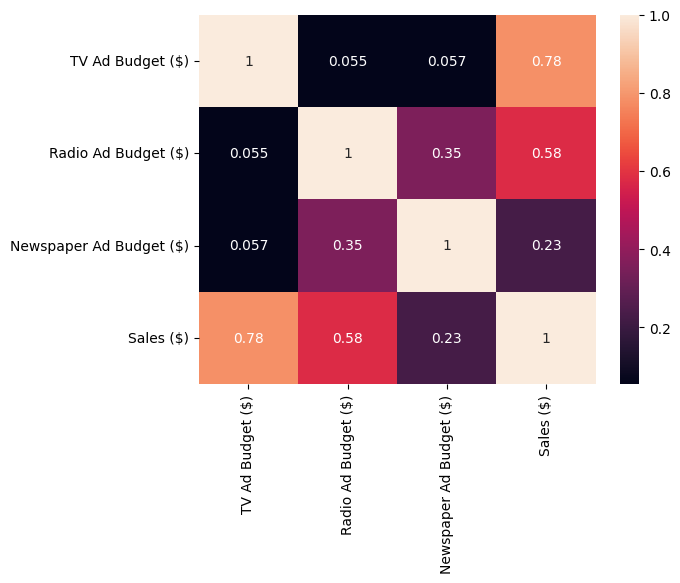

In [12]:
sns.heatmap(corr,annot=True)

# **Handling Outliers**

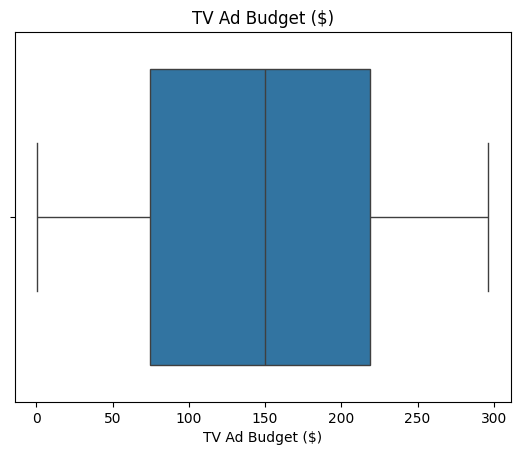

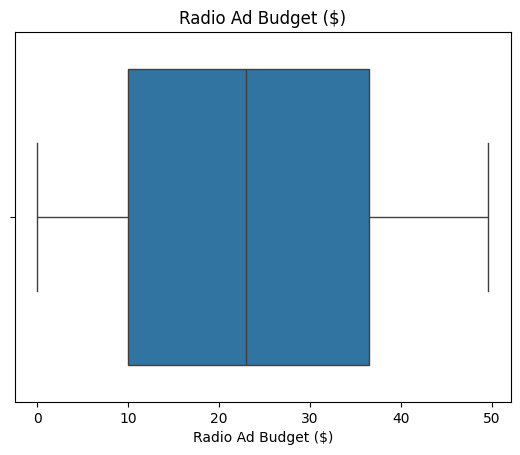

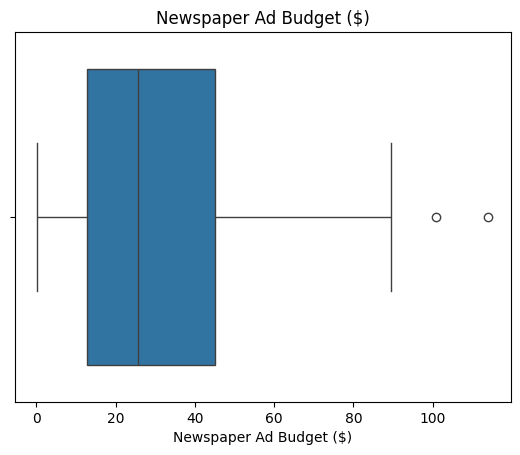

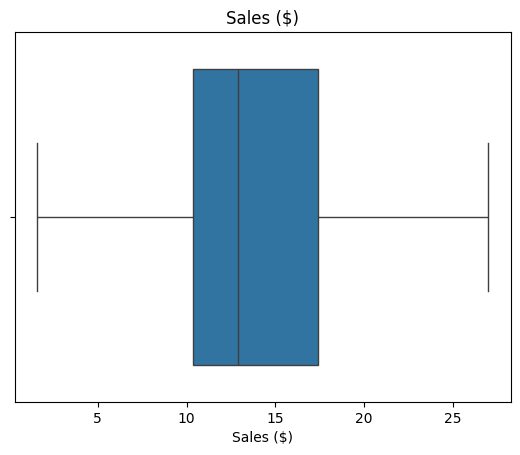

In [13]:
for i in df:
  sns.boxplot(x=df[i])
  plt.title(i)
  plt.show()

In [14]:
df.describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
TV Ad Budget ($),200.0,147.0425,85.854236,0.7,149.75,280.735,283.628,286.048,289.720,292.907,296.4
Radio Ad Budget ($),200.0,23.2640,14.846809,0.0,22.90,46.810,47.704,48.900,49.000,49.400,49.6
Newspaper Ad Budget ($),200.0,30.5540,21.778621,0.3,25.75,71.825,73.432,75.018,79.312,89.515,114.0
Sales ($),200.0,14.0225,5.217457,1.6,12.90,23.800,24.208,24.721,25.400,25.507,27.0


In [15]:
# Newspaper Ad Budget ($) has some outliers beyond maximum

In [16]:
import numpy as np

In [17]:
df['Newspaper Ad Budget ($)']=np.where(df['Newspaper Ad Budget ($)']>89.515,89.515,df['Newspaper Ad Budget ($)'])

**Removed outliers**

<Axes: xlabel='Newspaper Ad Budget ($)'>

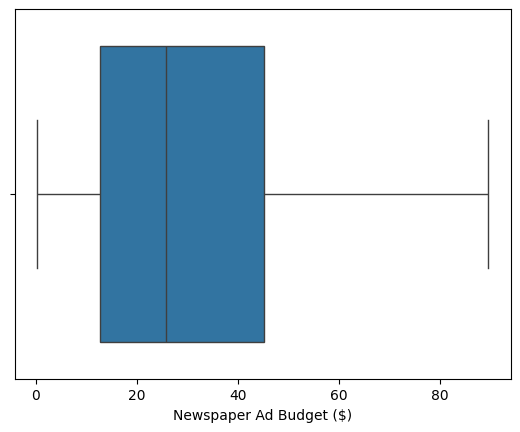

In [18]:
sns.boxplot(x=df['Newspaper Ad Budget ($)'])

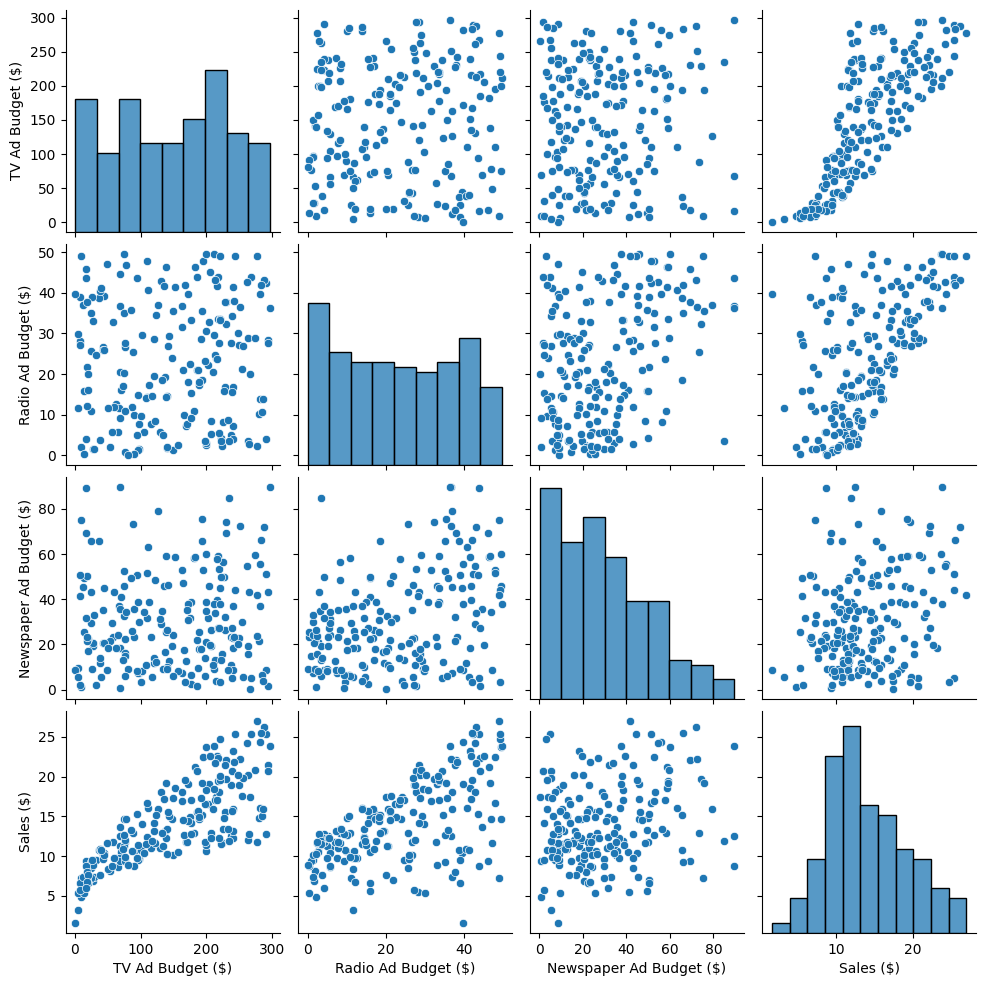

In [19]:
sns.pairplot(df)


In [20]:
df.dtypes

,0
TV Ad Budget ($),float64
Radio Ad Budget ($),float64
Newspaper Ad Budget ($),float64
Sales ($),float64


**Selecting x and y**

In [21]:
# x =    # x = df.iloc[:,:-1]
# y = df['Sales']               # y = df.iloc[:,-1]
x=df.drop(['Sales ($)'],axis=1)
y=df['Sales ($)']

print(x.shape)
print(y.shape)
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

(200, 3)
(200,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(200, 3)
(200,)


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
# [VIF_TV,VIF_radio,VIF_Newspaper]

[2.502538556259434, 3.310234163654874, 3.128683460551497]

In [24]:
# there is not much multicollinearity

**Splitting Data**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.4586954622276704
Mean Squared Error: 3.170704817369392
Root Mean Squared Error: 1.7806473029124525
R^2 Score: 0.8995455066845994


**OLS MODEL**

In [31]:
import statsmodels.api as sm

In [32]:
x1=x.copy()
y1=y.copy()

In [33]:
x1 = sm.add_constant(x1)
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sales ($)   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        09:42:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.9390      0.313      9.392      0.000       2.322       3.556
TV Ad Budget ($)            0.0458      0.001     32.806      0.000       0.043       0.049
Radio Ad Budget ($)         0.1885      0.009     21.874      0.000       0.172       0.206
Newspaper Ad Budget ($)    -0.0010      0.006     -0.173      0.863      -0.013       0.011
==============================================================================
Omnibus:                       60.394   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.157
Skew:                          -1.327   Prob(JB):                     1.50e-33
Kurtosis:                       6.331   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

0.8972098917304651
0.8956365737467477


Ridge regresion

In [41]:
from sklearn.linear_model import Ridge

In [42]:
rid1 = Ridge(alpha=35)
rid1.fit(x_train,y_train)

Ridge(alpha=35)

In [43]:
print('Train Score',rid1.score(x_train,y_train))
print('Test Score',rid1.score(x_test,y_test))

Train Score 0.8956939707052383
Test Score 0.8995497190756788


In [ ]:
## we can see that while using ridge are model is getting good results as compared to ola or Linear Regression